In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv("/Users/lewisclark/Downloads/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
df.shape

(2443651, 9)

In [4]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [5]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['asin'].duplicated().any()

np.True_

In [10]:
df = df.drop_duplicates(subset=['asin'], keep='first')

In [11]:
df['asin'].duplicated().sum()

np.int64(0)

In [12]:
category_freq = df['category'].value_counts()

print(category_freq)

category
Sports & Outdoors                 826076
Skin Care                          18755
Fragrances                         18563
Make-up                            18453
Manicure & Pedicure Products       17212
                                   ...  
Torches                               64
Smart Home Security & Lighting        57
Lighting                              50
Smart Speakers                        25
Cameras                               12
Name: count, Length: 296, dtype: int64


In [13]:
df['category'].value_counts().head(5)

category
Sports & Outdoors               826076
Skin Care                        18755
Fragrances                       18563
Make-up                          18453
Manicure & Pedicure Products     17212
Name: count, dtype: int64

/var/folders/sp/zmqgkgsj1992h0k71dlr78_80000gn/T/ipykernel_19191/1556119190.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')


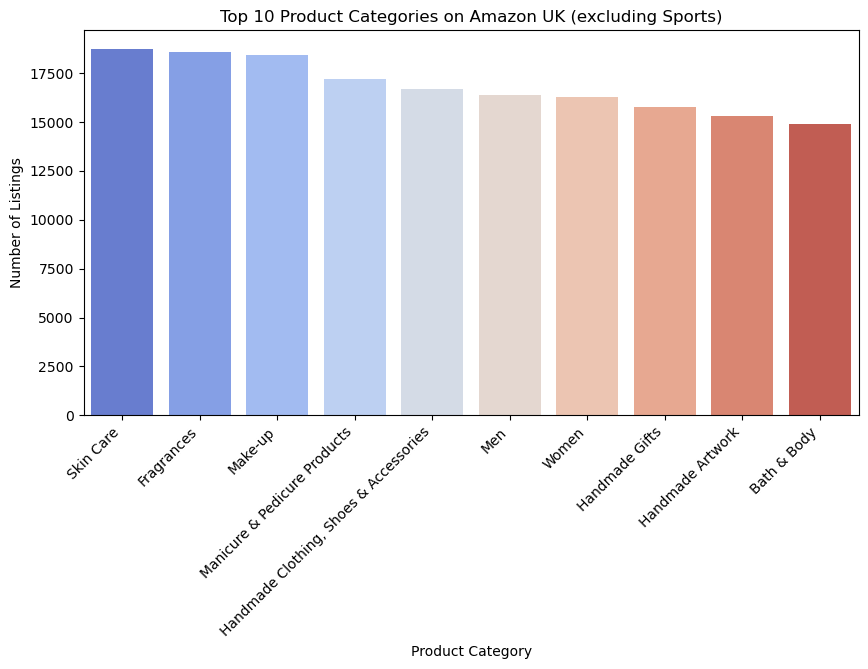

In [17]:
df_no_sports = df[df['category'] != 'Sports & Outdoors']

top_categories = df_no_sports['category'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.title('Top 10 Product Categories on Amazon UK (excluding Sports)')
plt.show()

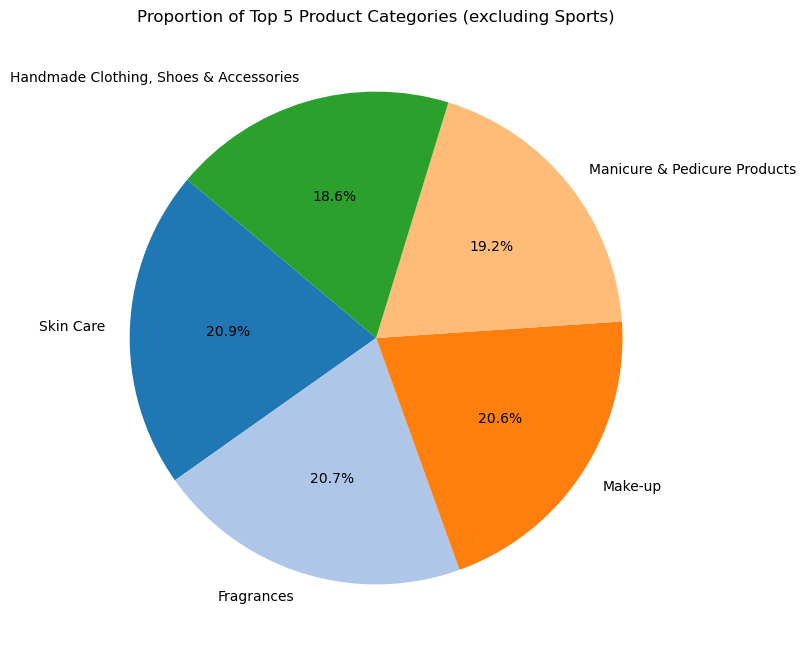

In [18]:
df_no_sports = df[df['category'] != 'Sports & Outdoors']

top_categories = df_no_sports['category'].value_counts().head(5)

plt.figure(figsize=(8,8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Proportion of Top 5 Product Categories (excluding Sports)')
plt.show()

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [8]:
print(df['price'].mean())
print(df['price'].median())
print(df['price'].mode())

89.24380943923663
19.09
0    9.99
Name: price, dtype: float64


In [9]:
### the relationship between mean and mode indicates that there must be some 
### highly expensive items that are bringing the average up

In [12]:
df_var = df['price'].var()
df_std = df['price'].std()

df_min = df['price'].min()
df_max = df['price'].max()
price_range = df_max - df_min

quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

print(df_var) 
print(df_std) 
print(df_min) 
print(df_max) 
print(price_range) 
print(quantiles_price)

119445.48532256528
345.60886175352226
0.0
100000.0
100000.0
0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


In [14]:
### shows there is a big range in the product prices

### but with median being 19.09 I think this indicates that we have a skew with a big tail 
### towards the expensive items

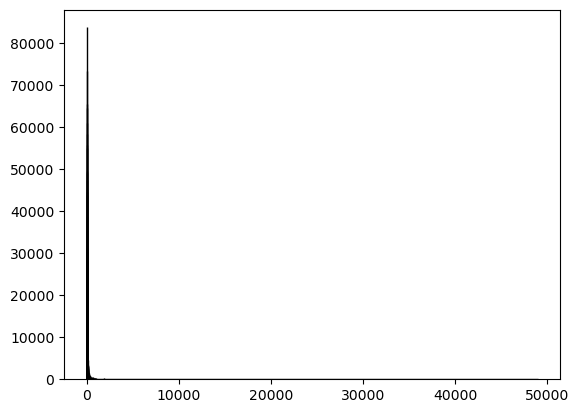

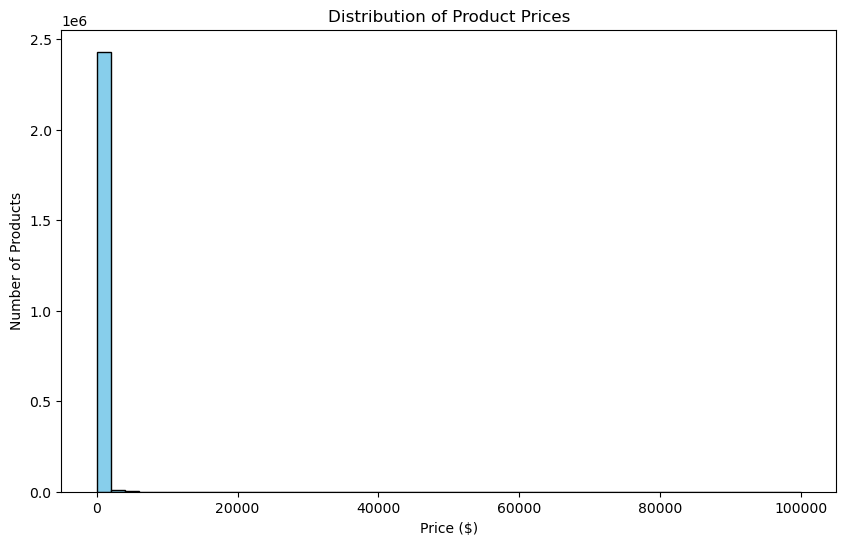

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Product Prices")
plt.xlabel("Price ($)")
plt.ylabel("Number of Products")
plt.show()

In [22]:
### had some difficulties creating the graph due to my laptop I think? 
### was taking a very long time to create

### very difficult graph to read because of the positive skew 
### surely could use a better type of graph or perhaps focus on different price ranges specifically

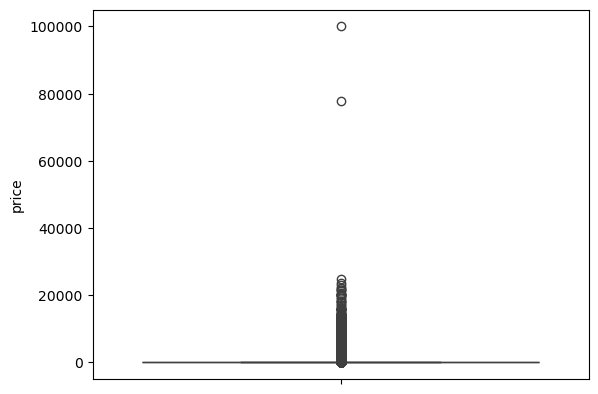

In [24]:
sns.boxplot(df['price'])
plt.show()

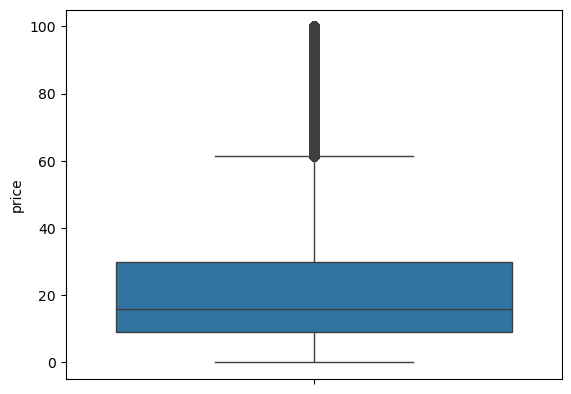

In [25]:
filtered_prices = df[df['price'] < 100]['price']

sns.boxplot(filtered_prices)
plt.show()

In [26]:
### here is a graph showing the a more concentrated version of the above box graph
### here i filtered the extreme outliers out, although as you can see there is still a lot included in this range

In [27]:
print(df['stars'].mean())
print(df['stars'].median())
print(df['stars'].mode())

2.152836472966065
0.0
0    0.0
Name: stars, dtype: float64


In [28]:
### odd that the median is 0?
### potentially someone/something has created a '0' placeholder for values that have no stars/rating

In [29]:
df_var_stars = df['stars'].var()
df_std_stars = df['stars'].std()

df_min_stars = df['stars'].min()
df_max_stars = df['stars'].max()
price_range_stars = df_max_stars - df_min_stars

quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])

print(df_var_stars)
print(df_std_stars)
print(df_min_stars)
print(df_max_stars)
print(price_range_stars)
print(quantiles_stars)

4.81743402976196
2.1948653785054697
0.0
5.0
5.0
0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


In [30]:
### there seems to be a wide variation, especially considering the scale is only 1-5
### this indicates that the feedback has been inconsistent

In [32]:
print(df['stars'].skew())

0.08120735761080985


In [33]:
### if it close to 0, doesn't this indicate that they're evenly distributed?

In [35]:
print(df['stars'].kurtosis())

-1.9260061280432985


In [36]:
### this seems on the medium to high side
### i think that because there is only 5 values in total then we're unlikely to ever get extreme values

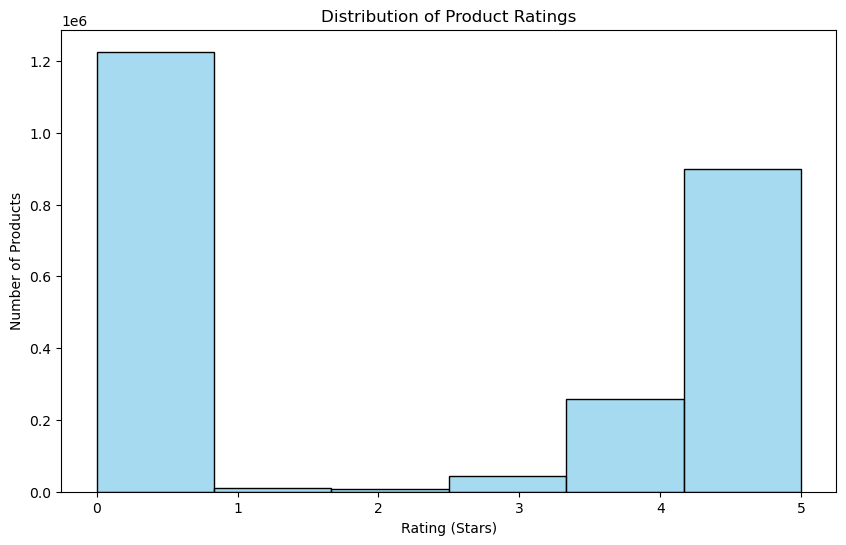

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['stars'], bins=6, kde=False, color='skyblue', edgecolor='black')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating (Stars)")
plt.ylabel("Number of Products")
plt.show()